In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('C:\\Users\\Kamalesh C\\Desktop\\DataScience\\canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


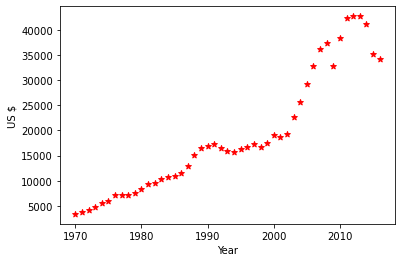

In [3]:
plt.xlabel('Year')
plt.ylabel('US $')
plt.scatter(df['year'],df['per capita income (US$)'],marker='*',color='red')

In [4]:
obj = linear_model.LinearRegression()
# 2d array and target to train linear regression model object
obj.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [5]:
print('m = ', obj.coef_)
print('c = ', obj.intercept_)

m =  [828.46507522]
c =  -1632210.7578554575


In [6]:
#Linear equation
obj.coef_*2020 + obj.intercept_

array([41288.69409442])

In [7]:
prediction_2020 = obj.predict([[2020]])
print('The prediction for the year 2020 is',prediction_2020[0])

The prediction for the year 2020 is 41288.69409441762


C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


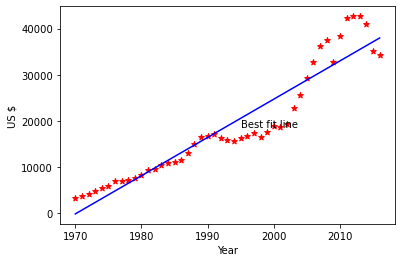

In [8]:
plt.xlabel('Year')
plt.ylabel('US $')
plt.scatter(df['year'],df['per capita income (US$)'],marker='*',color='red')
plt.plot(df['year'],obj.predict(df[['year']]),color='blue')
plt.text(1995, obj.predict([[1995]])[0] - 2000, 'Best fit line', fontsize=10, color='black')
plt.show()

In [9]:
df = pd.read_csv('C:\\Users\\Kamalesh C\\Desktop\\DataScience\\hiring.csv')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [10]:
df.shape

(8, 4)

In [11]:
df.count()

experience                    6
test_score(out of 10)         7
interview_score(out of 10)    8
salary($)                     8
dtype: int64

In [12]:
print(df)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [13]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [14]:
df['test_score(out of 10)'].median()

8.0

In [15]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(),inplace=True)

In [16]:
df.count()

experience                    6
test_score(out of 10)         8
interview_score(out of 10)    8
salary($)                     8
dtype: int64

In [17]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [18]:
from word2number import w2n

In [19]:
df['experience'].fillna('zero',inplace=True)

In [20]:
print(df)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    8.0                           7      72000
7     eleven                    7.0                           8      80000


In [21]:
arr = []
for i in range(0,df['experience'].count()):
    arr.append(w2n.word_to_num(df['experience'][i]))
df['Experience'] = arr
#d.experience = d.experience.apply(w2n.word_to_num)

In [22]:
print(df)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)  \
0       zero                    8.0                           9      50000   
1       zero                    8.0                           6      45000   
2       five                    6.0                           7      60000   
3        two                   10.0                          10      65000   
4      seven                    9.0                           6      70000   
5      three                    7.0                          10      62000   
6        ten                    8.0                           7      72000   
7     eleven                    7.0                           8      80000   

   Experience  
0           0  
1           0  
2           5  
3           2  
4           7  
5           3  
6          10  
7          11  


In [23]:
df.drop('experience',axis=1,inplace=True)

In [24]:
print(df)

   test_score(out of 10)  interview_score(out of 10)  salary($)  Experience
0                    8.0                           9      50000           0
1                    8.0                           6      45000           0
2                    6.0                           7      60000           5
3                   10.0                          10      65000           2
4                    9.0                           6      70000           7
5                    7.0                          10      62000           3
6                    8.0                           7      72000          10
7                    7.0                           8      80000          11


In [25]:
obj2 = linear_model.LinearRegression()
obj2.fit(df[['Experience','test_score(out of 10)', 'interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [26]:
obj2.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [27]:
obj2.intercept_

17737.26346433771

In [28]:
obj2.predict([[2,9,6]])

C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [29]:
obj2.predict([[12,10,10]])

C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

Both pickle and joblib are Python libraries used for serializing and deserializing Python objects. They are primarily used for saving Python objects to disk and loading them back into memory.

In [30]:
import pickle

In [31]:
with open('linear_model_pickle','wb') as f:
    pickle.dump(obj2,f)

In [32]:
with open('linear_model_pickle','rb') as f:
    pickle_obj = pickle.load(f)

In [33]:
pickle_obj.predict([[12,10,10]])

C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [40]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [42]:
import joblib
joblib.dump(obj2,'linear_model_joblib')

['linear_model_joblib']

In [43]:
joblib_obj = joblib.load('linear_model_joblib')

In [44]:
joblib_obj.predict([[2,9,6]])

C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [45]:
df = pd.read_csv('C:\\Users\\Kamalesh C\\Desktop\\DataScience\\carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


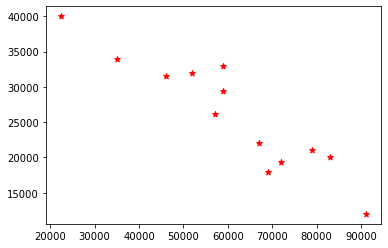

In [50]:
plt.scatter(df.Mileage,df['Sell Price($)'],color='red',marker='*')

In [53]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [61]:
df2 = pd.concat([df,dummies],axis=1)
df2.drop(['Car Model','Audi A5'],axis=1,inplace=True)
df2

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [62]:
obj = linear_model.LinearRegression()

In [64]:
df2.columns

Index(['Mileage', 'Sell Price($)', 'Age(yrs)', 'BMW X5',
       'Mercedez Benz C class'],
      dtype='object')

In [66]:
obj.fit(df2[['Mileage','Age(yrs)','BMW X5','Mercedez Benz C class']],df2['Sell Price($)'])

LinearRegression()

In [69]:
obj.predict([[45000,4,0,1]])

C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [70]:
obj.predict([[86000,7,1,0]])

C:\Users\Kamalesh C\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [71]:
obj.score(df2[['Mileage','Age(yrs)','BMW X5','Mercedez Benz C class']],df2['Sell Price($)'])

0.9417050937281082